In [1]:
from time import time
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
## Data collection

- **Initial Dataset**: Started with an open-source dataset containing one million tweets from 2009, all pre-labeled for sentiment polarity.

- **Filtering Process**: Narrowed down to approximately 100,000 tweets focusing on sociopolitical topics.

- **Resulting Dataset**: Created a sizable and diverse dataset, highly relevant for training and validating models on real-world data.

In [17]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1", header=None)

df.columns = ["label", "time", "date", "query", "username", "text"]
df['lower_text'] = df['text'].str.lower()

df.tail()

,label,time,date,query,username,text,lower_text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,just woke up. having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdb.com - very cool to hear old walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover? ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...,happy #charitytuesday @thenspcc @sparkscharity...


In [22]:
keywords = [
    # Presidents, Leaders, and Variations
    'president', 'potus', 'commander-in-chief', 'head of state', 'head of government',
    'presidential', 'vice-president', 'vp', 'president-elect', 'oval office',
    'executive office', 'chief executive', 'administration',

    # Other Political Figures and Titles
    'governor', 'mayor', 'senator', 'representative', 'congressman', 'congresswoman',
    'parliamentarian', 'prime minister', 'cabinet minister', 'politician', 'ambassador',
    'diplomat', 'bureaucrat', 'party leader', 'opposition leader', 'whip',

    # Political Concepts and Structures
    'democracy', 'republic', 'parliament', 'senate', 'house of representatives',
    'congress', 'judiciary', 'supreme court', 'constitutional court', 'governance',
    'federalism', 'centralization', 'decentralization', 'monarchy', 'authoritarianism',

    # Political Movements and Ideologies
    'nationalism', 'populism', 'socialism', 'marxism', 'anarchism', 'fascism',
    'neoliberalism', 'libertarianism', 'progressivism', 'conservatism', 'capitalism',
    'communism', 'authoritarianism', 'technocracy', 'pluralism',

    # Economic Terms and Policies
    'inflation', 'deflation', 'unemployment', 'gdp', 'trade', 'tariff', 'subsidy',
    'public debt', 'poverty', 'recession', 'stimulus package', 'economic policy',
    'fiscal policy', 'monetary policy', 'trade agreement', 'welfare state',
    'minimum wage', 'basic income', 'income inequality', 'financial regulation',

    # Social Issues and Rights
    'civil rights', 'lgbtq+ rights', 'racial equality', 'social justice',
    'healthcare reform', 'immigration', 'refugee', 'gun control',
    'criminal justice', 'police reform', 'income inequality', 'abortion',
    'gender equality', 'education reform', 'child welfare', 'poverty alleviation',
    'human trafficking', 'social welfare', 'food security', 'urban planning',

    # International Relations
    'united nations', 'nato', 'eu', 'asean', 'g7', 'g20', 'oecd', 'au', 'mercosur',
    'foreign policy', 'alliance', 'treaty', 'sanctions', 'peace talks',
    'international law', 'trade bloc', 'extradition', 'diplomacy', 'expatriate',
    'global governance',

    # Defense and National Security
    'terrorism', 'war on terror', 'cybersecurity', 'nuclear weapons',
    'defense budget', 'armed forces', 'national guard', 'homeland security',
    'patriot act', 'intelligence agency', 'asylum seeker', 'security council',
    'military-industrial complex', 'paramilitary', 'martial law',

    # Environmental Issues and Policies
    'climate change', 'global warming', 'paris agreement', 'renewable energy',
    'carbon tax', 'pollution', 'endangered species', 'deforestation',
    'sustainable development', 'environmental policy', 'clean energy',
    'electric vehicle', 'wildlife conservation', 'ozone layer',

    # Technology and Digital Policy
    'net neutrality', 'data privacy', 'social media regulation', 'fake news',
    'encryption', 'surveillance', 'cyber warfare', '5g network', 'blockchain',
    'artificial intelligence', 'tech regulation', 'internet censorship',
    'deepfake', 'digital identity', 'biometric data',

    # Political Scandals and Investigations
    'impeachment', 'watergate', 'russiagate', 'wikileaks', 'email scandal',
    'whistleblower', 'corruption', 'quid pro quo', 'obstruction of justice',
    'money laundering', 'fraud', 'perjury', 'insider trading',

    # Other Political Issues and Events
    'primary election', 'general election', 'runoff', 'campaign finance',
    'polling', 'ballot measure', 'exit polls', 'absentee voting', 'gerrymandering',
    'turnout', 'referendum', 'political asylum', 'voter suppression'
]

# Create a regex pattern from these keywords
pattern = '|'.join(keywords)

# Filter the DataFrame rows that contains any of the keywords
filtered_df_2 = df[df['lower_text'].str.contains(pattern, case=False, na=False)]

filtered_df_2

,label,time,date,query,username,text,lower_text
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."
35,0,1467816749,Mon Apr 06 22:21:20 PDT 2009,NO_QUERY,scarletletterm,ok I'm sick and spent an hour sitting in the s...,ok i'm sick and spent an hour sitting in the s...
38,0,1467817502,Mon Apr 06 22:21:32 PDT 2009,NO_QUERY,Tmttq86,@fleurylis I don't either. Its depressing. I d...,@fleurylis i don't either. its depressing. i d...
50,0,1467820863,Mon Apr 06 22:22:23 PDT 2009,NO_QUERY,tautao,Broadband plan 'a massive broken promise' http...,broadband plan 'a massive broken promise' http...
55,0,1467821715,Mon Apr 06 22:22:37 PDT 2009,NO_QUERY,deelau,"@andywana Not sure what they are, only that th...","@andywana not sure what they are, only that th..."
...,...,...,...,...,...,...,...
1599952,4,2193577586,Tue Jun 16 08:38:51 PDT 2009,NO_QUERY,IsabellesTravel,#Traveltuesday @GuyNGirlTravels Because their ...,#traveltuesday @guyngirltravels because their ...
1599955,4,2193577616,Tue Jun 16 08:38:51 PDT 2009,NO_QUERY,twisted4ddub,@_CrC_ mornin.. I'm enjoying a beautiful morni...,@_crc_ mornin.. i'm enjoying a beautiful morni...
1599962,4,2193577852,Tue Jun 16 08:38:52 PDT 2009,NO_QUERY,dacyj,@GroleauNET Yeah I'm being an ass today,@groleaunet yeah i'm being an ass today
1599969,4,2193578170,Tue Jun 16 08:38:54 PDT 2009,NO_QUERY,bobzipp,@davepell you're the undisputed authority on t...,@davepell you're the undisputed authority on t...


In [23]:
filtered_df_2.to_csv('new_data.csv', index=False)

In [70]:
data_raw = pd.read_csv('new_data.csv')
data_raw.head()


,label,time,date,query,username,text,lower_text
0,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."
1,0,1467816749,Mon Apr 06 22:21:20 PDT 2009,NO_QUERY,scarletletterm,ok I'm sick and spent an hour sitting in the s...,ok i'm sick and spent an hour sitting in the s...
2,0,1467817502,Mon Apr 06 22:21:32 PDT 2009,NO_QUERY,Tmttq86,@fleurylis I don't either. Its depressing. I d...,@fleurylis i don't either. its depressing. i d...
3,0,1467820863,Mon Apr 06 22:22:23 PDT 2009,NO_QUERY,tautao,Broadband plan 'a massive broken promise' http...,broadband plan 'a massive broken promise' http...
4,0,1467821715,Mon Apr 06 22:22:37 PDT 2009,NO_QUERY,deelau,"@andywana Not sure what they are, only that th...","@andywana not sure what they are, only that th..."


In [71]:
df = data_raw[['label', 'lower_text']]
df.head()

,label,lower_text
0,0,"@nationwideclass no, it's not behaving at all...."
1,0,ok i'm sick and spent an hour sitting in the s...
2,0,@fleurylis i don't either. its depressing. i d...
3,0,broadband plan 'a massive broken promise' http...
4,0,"@andywana not sure what they are, only that th..."


In [72]:
df['label'].value_counts()

label
4    52400
0    47066
Name: count, dtype: int64

## Cleaning and Processing the Data

Tweets, by their nature, are informal and cluttered with slang, hashtags, links, and mentions that can obscure meaningful analysis. To address this, I implemented a series of cleaning procedures to strip unnecessary noise from the data. This included:
- Removing URLs and hyperlinks that add no sentiment value.
- Stripping away mentions and hashtags unless they were directly relevant to the sentiment.
- Standardizing text to a uniform format to reduce the complexity of the dataset.

In [73]:
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer(reduce_len=True)

data = []

X = df['lower_text'].tolist()
Y = df['label'].tolist()

for x, y in zip(X, Y):
    if y == 4:
        data.append((tk.tokenize(x), 1))
    else:
        data.append((tk.tokenize(x), 0))
        
data[:5]

[(['@nationwideclass',
   'no',
   ',',
   "it's",
   'not',
   'behaving',
   'at',
   'all',
   '.',
   "i'm",
   'mad',
   '.',
   'why',
   'am',
   'i',
   'here',
   '?',
   'because',
   'i',
   "can't",
   'see',
   'you',
   'all',
   'over',
   'there',
   '.'],
  0),
 (['ok',
   "i'm",
   'sick',
   'and',
   'spent',
   'an',
   'hour',
   'sitting',
   'in',
   'the',
   'shower',
   'cause',
   'i',
   'was',
   'too',
   'sick',
   'to',
   'stand',
   'and',
   'held',
   'back',
   'the',
   'puke',
   'like',
   'a',
   'champ',
   '.',
   'bed',
   'now'],
  0),
 (['@fleurylis',
   'i',
   "don't",
   'either',
   '.',
   'its',
   'depressing',
   '.',
   'i',
   "don't",
   'think',
   'i',
   'even',
   'want',
   'to',
   'know',
   'about',
   'the',
   'kids',
   'in',
   'suitcases',
   '.'],
  0),
 (['broadband',
   'plan',
   "'",
   'a',
   'massive',
   'broken',
   'promise',
   "'",
   'http://tinyurl.com/dcuc33',
   'via',
   'www.diigo.com/~tautao',
  

In [13]:
import re
import string
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure necessary resources are downloaded
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Set of stop words
STOP_WORDS = set(stopwords.words('english'))

# Initialize the lemmatizer globally
lemmatizer = WordNetLemmatizer()

# Replacement rules
replacement_dict = {
    'u': 'you',
    'r': 'are',
    'some1': 'someone',
    'yrs': 'years',
    'hrs': 'hours',
    'mins': 'minutes',
    'secs': 'seconds',
    'pls': 'please',
    'plz': 'please',
    '2morow': 'tomorrow',
    '2day': 'today',
    '4got': 'forget',
    '4gotten': 'forget',
    'lolz': 'lol',
    'lmao': 'lol',
    'rofl': 'lol',
    '<3': 'love',
    'thanx': 'thanks',
    'thnx': 'thanks',
    'goood': 'good',
    'hahah': 'haha',
    'hahaha': 'haha',
    'hahahaha': 'haha',
    'bday': 'birthday',
    'b-day': 'birthday',
    'mother\'s': 'mother',
    'mom\'s': 'mom',
    'dad\'s': 'dad',
    'amp': '',
    'quot': '',
    'lt': '',
    'gt': '',
    '½25': '',
    '..': '',
    '. .': '',
    '. . .': ''
}

# Function to clean tokens based on replacement rules
def cleaned(token):
    return replacement_dict.get(token, token)

# Function to map POS tags to WordNet tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('NN'):
        return wordnet.NOUN
    elif treebank_tag.startswith('VB'):
        return wordnet.VERB
    elif treebank_tag.startswith('JJ'):
        return wordnet.ADJ
    elif treebank_tag.startswith('RB'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Noise removal function incorporating the replacement logic
def remove_noise(tweet_tokens):
    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        # Remove URLs and mentions
        token = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', token)
        token = re.sub(r'@[A-Za-z0-9_]+', '', token)

        # Map POS tag and lemmatize
        pos = get_wordnet_pos(tag)
        token = lemmatizer.lemmatize(token.lower(), pos)

        # Handle contractions and specific replacements
        contractions = {
            "idk": ["i", "dont", "know"],
            "i'll": ["i", "will"],
            "you're": ["you", "are"],
            "we're": ["we", "are"],
            "they're": ["they", "are"],
            "i'm": ["i", "am"],
            "can't": ["can", "not"]
            # Add more as needed
        }

        if token in contractions:
            cleaned_tokens.extend(contractions[token])
        else:
            cleaned_token = cleaned(token)

            # Add cleaned token to final list if it passes all filters
            if cleaned_token.strip() and cleaned_token not in string.punctuation and len(cleaned_token) > 2 and cleaned_token not in STOP_WORDS:
                cleaned_tokens.append(cleaned_token)

    return cleaned_tokens


[nltk_data] Downloading package wordnet to /Users/yenphan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yenphan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
print(remove_noise(data[1][0]))
print(remove_noise(data[2][0]))
print(remove_noise(data[3][0]))

['i', 'am', 'sick', 'spend', 'hour', 'sit', 'shower', 'cause', 'sick', 'stand', 'hold', 'back', 'puke', 'like', 'champ', 'bed']
['either', 'depressing', 'think', 'even', 'want', 'know', 'kid', 'suitcase']
['broadband', 'plan', 'massive', 'broken', 'promise', 'via', 'www.diigo.com/~tautao', 'still', 'wait', 'broadband']


In [52]:
data_raw = pd.read_csv('new_data.csv')
df_clean = data_raw[['label', 'lower_text']].copy()
df_clean['clean_text'] = df_clean['lower_text'].apply(lambda x: ' '.join(remove_noise(x.split())))
df_clean.drop(columns=['lower_text'], inplace=True)

df_clean

,label,clean_text
0,0,"no, behave all. i am mad. here? can not see th..."
1,0,i am sick spend hour sit shower cause sick sta...
2,0,either. depressing. think even want know kid s...
3,0,broadband plan massive broken promise' via www...
4,0,"sure are, pos! much want to, dont think trade ..."
...,...,...
99461,4,#traveltuesday tweet hilarious lol they are gr...
99462,4,mornin.. i am enjoy beautiful morning phoenix....
99463,4,yeah i am today
99464,4,you are undisputed authority topic. goog recog...


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer(reduce_len=True)

data = []

X = df_clean['clean_text'].tolist()
Y = df_clean['label'].tolist()

for x, y in zip(X, Y):
    if y == 4:
        data.append((tk.tokenize(x), 1))
    else:
        data.append((tk.tokenize(x), 0))


def list_to_dict(cleaned_tokens):
    return dict((token, True) for token in cleaned_tokens)

cleaned_tokens_list = []

# Remove noise from all tokens in the dataset
for tokens, label in data:
    cleaned_tokens_list.append((remove_noise(tokens), label))

    
positive_words = []
negative_words = []

for tokens, label in cleaned_tokens_list:
    if label == 1:
        positive_words.extend(tokens)
    else:
        negative_words.extend(tokens)

# Define the word cloud drawing function
def wordcloud_draw(data, color='black', title='Word Cloud'):
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color=color,
                          width=2500,
                          height=2000
                         ).generate(' '.join(data))
    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(positive_words, 'white', title='Positive Words')

print("Negative words")
wordcloud_draw(negative_words, title='Negative Words')

In [66]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


df_clean['label_name'] = df_clean['label'].replace({0: 'Negative', 4: 'Positive'})

# Prepare data for plotting
label_counts = df_clean['label_name'].value_counts()

# Plotting
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])

colors = ['red', 'blue']

# Pie chart
fig.add_trace(
    go.Pie(labels=label_counts.index, values=label_counts.values, textinfo='label+percent', name=''),
    row=1, col=1
)

# Bar chart
fig.add_trace(
    go.Bar(x=label_counts.index, y=label_counts.values, marker_color=colors, name=''),
    row=1, col=2
)

fig.update_layout(
    title_text='Label Distribution',
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig.show()

Positive words


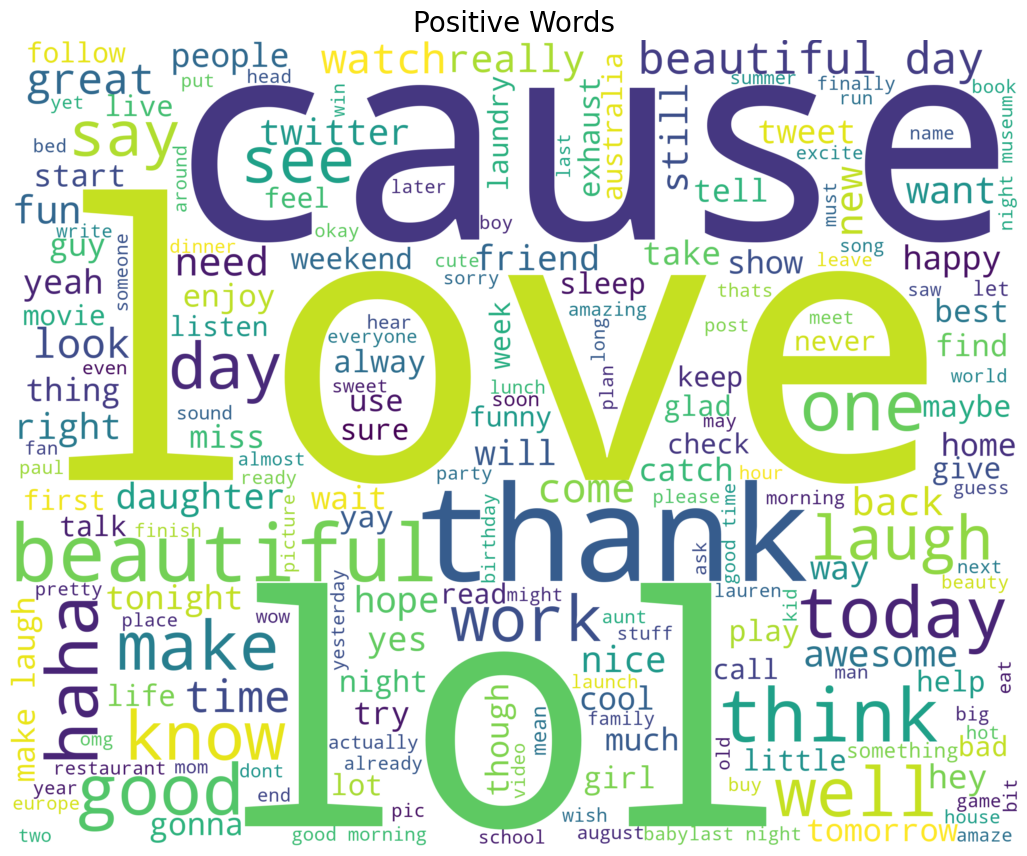

Negative words


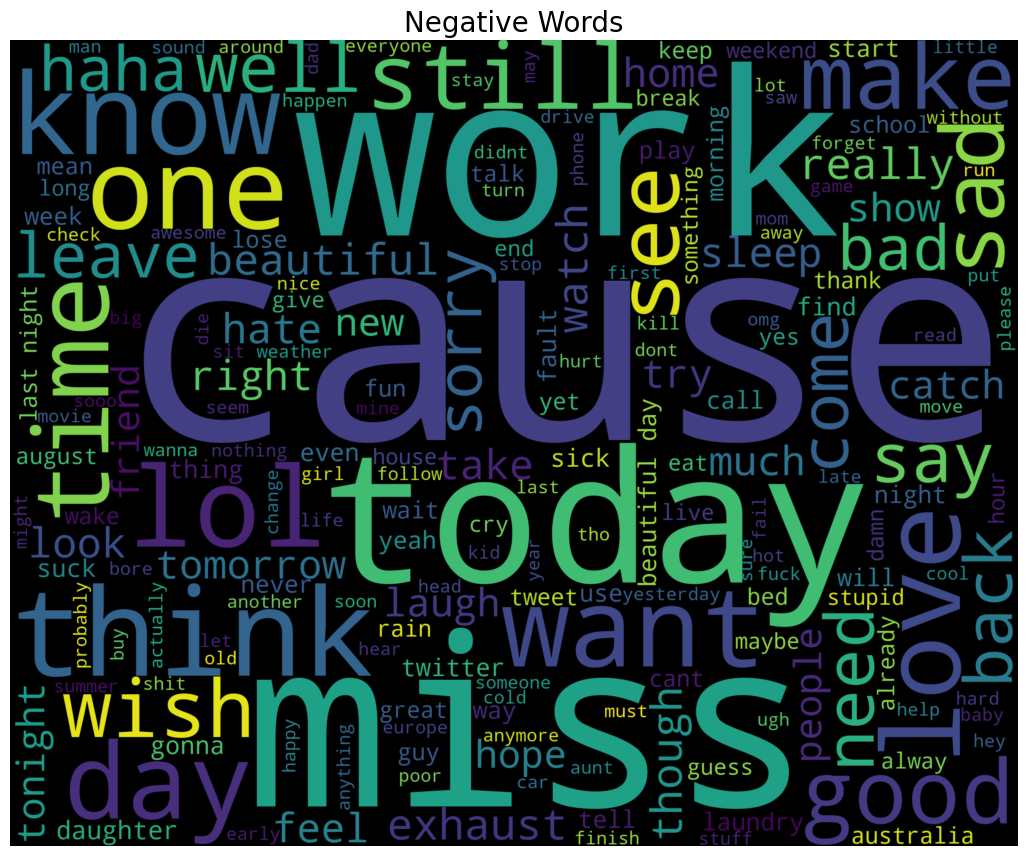

In [76]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Function to convert lists to a dictionary for Naive Bayes
def list_to_dict(cleaned_tokens):
    return dict((token, True) for token in cleaned_tokens)

cleaned_tokens_list = []

# Remove noise from all tokens in the dataset
for tokens, label in data:
    cleaned_tokens_list.append((remove_noise(tokens), label))

    
positive_words = []
negative_words = []

for tokens, label in cleaned_tokens_list:
    if label == 1:
        positive_words.extend(tokens)
    else:
        negative_words.extend(tokens)

# Define the word cloud drawing function
def wordcloud_draw(data, color='black', title='Word Cloud'):
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color=color,
                          width=2500,
                          height=2000
                         ).generate(' '.join(data))
    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(positive_words, 'white', title='Positive Words')

print("Negative words")
wordcloud_draw(negative_words, title='Negative Words')

---
## Model selection
Given the project's aim to delve deep into sentiments, I selected a range of models from simple to complex to see how each would perform with the nuanced data. This included everything from baseline models like Naive Bayes for quick and dirty analysis, to more sophisticated structures like CNNs and LSTMs which are capable of capturing deeper textual relations and sentiments over longer sequences.


## Naive Bayes model

In [74]:
# Function to convert lists to a dictionary for Naive Bayes
def list_to_dict(cleaned_tokens):
    return dict((token, True) for token in cleaned_tokens)

cleaned_tokens_list = []

# Remove noise from all tokens in the dataset
for tokens, label in data:
    cleaned_tokens_list.append((remove_noise(tokens), label))

# Prepare the dataset for Naive Bayes input
Naive_Bayes = []
for tokens, label in cleaned_tokens_list:
    Naive_Bayes.append((list_to_dict(tokens), label))

print(Naive_Bayes[:5])


[({'behave': True, 'i': True, 'am': True, 'mad': True, 'can': True, 'not': True, 'see': True}, 0), ({'i': True, 'am': True, 'sick': True, 'spend': True, 'hour': True, 'sit': True, 'shower': True, 'cause': True, 'stand': True, 'hold': True, 'back': True, 'puke': True, 'like': True, 'champ': True, 'bed': True}, 0), ({'either': True, 'depressing': True, 'think': True, 'even': True, 'want': True, 'know': True, 'kid': True, 'suitcase': True}, 0), ({'broadband': True, 'plan': True, 'massive': True, 'broken': True, 'promise': True, 'via': True, 'www.diigo.com/~tautao': True, 'still': True, 'wait': True}, 0), ({'sure': True, 'pos': True, 'much': True, 'want': True, 'dont': True, 'think': True, 'trade': True, 'away': True, 'company': True, 'asset': True, 'sorry': True, 'andy': True}, 0)]


In [139]:
import random
from nltk import classify, NaiveBayesClassifier
from nltk.tokenize import TweetTokenizer

random.seed(140)
random.shuffle(Naive_Bayes)

split_ratio = 0.8
trim_index = int(len(Naive_Bayes) * split_ratio)

train_data = Naive_Bayes[:trim_index]
test_data = Naive_Bayes[trim_index:]

# Train a Naive Bayes Classifier
classifier = NaiveBayesClassifier.train(train_data)

# Output model accuracy on training and testing datasets
print('Accuracy on train data:', classify.accuracy(classifier, train_data))
print('Accuracy on test data:', classify.accuracy(classifier, test_data))

# Show the most informative features
classifier.show_most_informative_features(20)

# Initialize the TweetTokenizer object
tk = TweetTokenizer()

Accuracy on train data: 0.8321808778024777
Accuracy on test data: 0.7303709661204383
Most Informative Features
                 100,000 = True                1 : 0      =     39.9 : 1.0
                migraine = True                0 : 1      =     35.2 : 1.0
                father's = True                0 : 1      =     29.3 : 1.0
                  farrah = True                0 : 1      =     23.4 : 1.0
               miserable = True                0 : 1      =     22.6 : 1.0
                  gutted = True                0 : 1      =     21.4 : 1.0
                 annoyed = True                0 : 1      =     21.1 : 1.0
               insurance = True                0 : 1      =     21.1 : 1.0
            disappointed = True                0 : 1      =     19.6 : 1.0
                     sad = True                0 : 1      =     19.4 : 1.0
               depressed = True                0 : 1      =     18.5 : 1.0
                  sadden = True                0 : 1      =     

In [140]:
custom_tweet = "What a wonderful experience at the concert last night. The band was awesome!"
custom_tokens = remove_noise(tk.tokenize(custom_tweet))
classification_result = classifier.classify(dict([token, True] for token in custom_tokens))

print(f"Tweet: {custom_tweet}")
print(f"Classification Result: {classification_result}")


Tweet: What a wonderful experience at the concert last night. The band was awesome!
Classification Result: 1


In [141]:
custom_tweet = "This is the worst movie I've ever watched. So disappointed."
custom_tokens = remove_noise(tk.tokenize(custom_tweet))
classification_result = classifier.classify(dict([token, True] for token in custom_tokens))

print(f"Tweet: {custom_tweet}")
print(f"Classification Result: {classification_result}")


Tweet: This is the worst movie I've ever watched. So disappointed.
Classification Result: 0


In [142]:
custom_tweet = "The movie was okay. Some parts were great, but others felt slow."
custom_tokens = remove_noise(tk.tokenize(custom_tweet))
classification_result = classifier.classify(dict([token, True] for token in custom_tokens))

print(f"Tweet: {custom_tweet}")
print(f"Classification Result: {classification_result}")


Tweet: The movie was okay. Some parts were great, but others felt slow.
Classification Result: 1


In [145]:
custom_tweet = "There are pros and cons to this new policy. Some people may benefit, but others won't."
custom_tokens = remove_noise(tk.tokenize(custom_tweet))
classification_result = classifier.classify(dict([token, True] for token in custom_tokens))

print(f"Tweet: {custom_tweet}")
print(f"Classification Result: {classification_result}")


Tweet: There are pros and cons to this new policy. Some people may benefit, but others won't.
Classification Result: 0


The model's performance analysis:

**Accuracy:**
- Training: 83.2% accuracy indicates effective pattern learning on training data.
- Testing: 73.0% accuracy suggests slight overfitting.

**Most Informative Features:**
- Words like "migraine," "father's," "gutted," and "disappointed" are strong indicators of negative sentiment.
- "100,000" and "#followfriday" are tied to positive sentiment.

**Limitations:**
- The model may not effectively capture the nuances of neutral or mixed sentiments.
- Such challenges arise because Naive Bayes classifiers work best with distinctly separated classes rather than mixed or ambiguous classes.

---
## Word2Vec

In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.manifold import TSNE


# Apply noise removal function to clean text data
df.loc[:, 'clean_text'] = df['lower_text'].apply(lambda x: ' '.join(remove_noise(x.split())))

# Tokenize the cleaned text data and store safely with .loc
df.loc[:, 'tokens_gensim'] = df['clean_text'].apply(word_tokenize)

# Encode labels to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['label'])

# Train Word2Vec model on the tokenized data
word2vec_model = Word2Vec(sentences=df['tokens_gensim'], vector_size=100, window=5, min_count=2, workers=4)

# Function to create an average vector for a sentence
def sentence_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(vectors, axis=0)

# Create sentence vectors using the Word2Vec model and store them safely
df.loc[:, 'sentence_vector'] = df['tokens_gensim'].apply(lambda x: sentence_vector(x, word2vec_model))

# Prepare data for training and testing
X = np.stack(df['sentence_vector'].values)
y = labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.62      0.64      9513
           1       0.67      0.73      0.70     10381

    accuracy                           0.67     19894
   macro avg       0.67      0.67      0.67     19894
weighted avg       0.67      0.67      0.67     19894



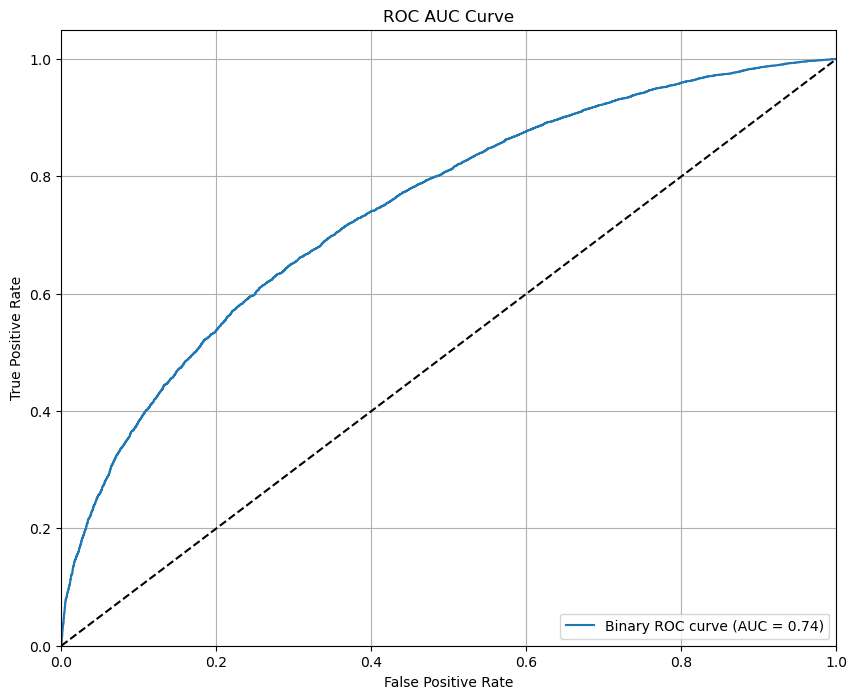

In [201]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Determine the number of unique classes
n_classes = len(np.unique(y_test))

# Binarize the labels for ROC AUC calculation
if n_classes > 2:
    y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))
    y_score = clf.predict_proba(X_test)

    # Initialize dictionaries to store FPR, TPR, and AUC
    fpr, tpr, roc_auc = {}, {}, {}

    # Calculate ROC AUC for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calculate the micro-averaged ROC curve and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["micro"]))

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

else:
    # Handle binary classification case
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot the binary ROC curve
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label='Binary ROC curve (AUC = {0:0.2f})'.format(roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


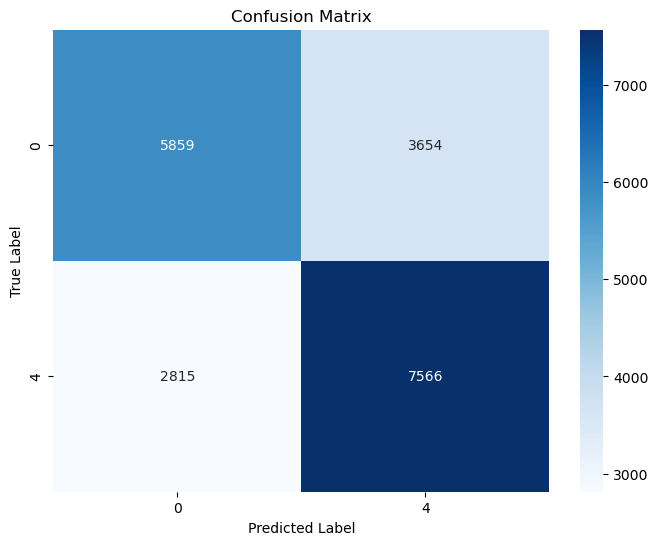

In [195]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Interpretation:**

- The ROC AUC Curve shows an AUC of 0.74. This metric represents the ability of the model to discriminate between the positive and negative classes. An AUC of 0.74 indicates a good model performance. The curve itself, being significantly above the diagonal line of no-discrimination, confirms that the model has a reasonable capability to distinguish between the classes.

- Confusion Matrix:
    - True Negatives (TN): 5859 instances were correctly predicted as negative.
    - False Positives (FP): 3654 negative instances were incorrectly classified as positive.
    - False Negatives (FN): 2815 positive instances were incorrectly classified as negative.
    - True Positives (TP): 7566 instances were correctly predicted as positive.

This distribution suggests that while the model is relatively effective at identifying positive cases, it also misclassifies a significant number of negative cases as positive.

- Model Strengths: The model is more effective at identifying true positive cases than true negative cases, as indicated by a higher recall for positive instances.
- Areas for Improvement:
    - The false positive rate is relatively high, suggesting that the model might benefit from better negative case discrimination or rebalancing of class weights.
    - Precision for both classes is below 70%, indicating a potential area for improvement in ensuring that predictions are more reliable.

---
## CNN

/var/folders/z0/1j3jjj4961l_pl7k7vwpyfs80000gn/T/ipykernel_17231/1593283416.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['lower_text'].apply(lambda x: ' '.join(remove_noise(x.split())))


Epoch 1/10
1244/1244 [==============================] - 29s 23ms/step - loss: 0.5508 - accuracy: 0.7153 - val_loss: 0.5112 - val_accuracy: 0.7487
Epoch 2/10
1244/1244 [==============================] - 26s 21ms/step - loss: 0.4866 - accuracy: 0.7678 - val_loss: 0.5099 - val_accuracy: 0.7491
Epoch 3/10
1244/1244 [==============================] - 26s 21ms/step - loss: 0.4450 - accuracy: 0.7898 - val_loss: 0.5249 - val_accuracy: 0.7437
Epoch 4/10
1244/1244 [==============================] - 484s 389ms/step - loss: 0.4012 - accuracy: 0.8122 - val_loss: 0.5379 - val_accuracy: 0.7401
Epoch 5/10
1244/1244 [==============================] - 28s 23ms/step - loss: 0.3574 - accuracy: 0.8376 - val_loss: 0.5766 - val_accuracy: 0.7336
Epoch 6/10
1244/1244 [==============================] - 31s 25ms/step - loss: 0.3199 - accuracy: 0.8561 - val_loss: 0.6699 - val_accuracy: 0.7306
Epoch 7/10
1244/1244 [==============================] - 27s 21ms/step - loss: 0.2847 - accuracy: 0.8742 - val_loss: 0.7127

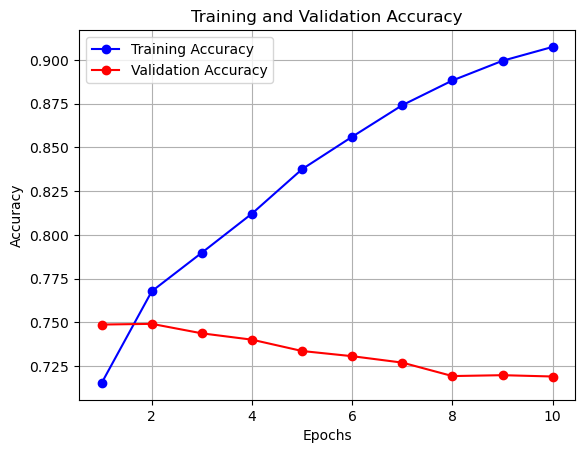

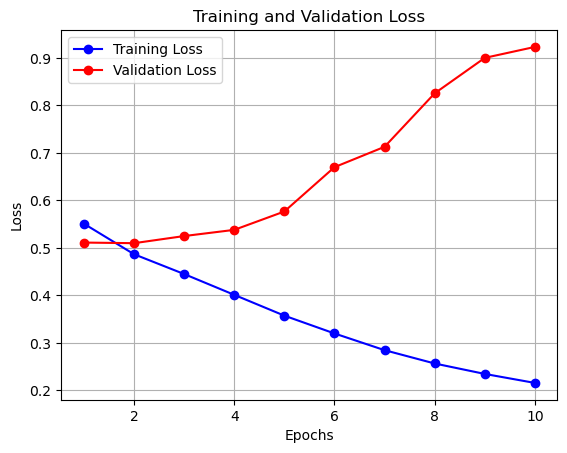

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import matplotlib.pyplot as plt

df['clean_text'] = df['lower_text'].apply(lambda x: ' '.join(remove_noise(x.split())))

# Encode labels to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['label'])
num_classes = len(np.unique(labels))

# Tokenize the clean text data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['clean_text'])
sequences = tokenizer.texts_to_sequences(df['clean_text'])
word_index = tokenizer.word_index

# Pad sequences to ensure consistent input length
max_seq_length = 100
data = pad_sequences(sequences, maxlen=max_seq_length)

# Convert labels to one-hot encoded format
labels = to_categorical(labels, num_classes=num_classes)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define the CNN model with dropout and pooling
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_seq_length))

# Add convolutional layer with pooling and dropout
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting

# Additional Dense layers with dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Another dropout layer
model.add(Dense(num_classes, activation='softmax')) 

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and save the history object
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, shuffle=True)

# Function to plot training and validation accuracy/loss
def plot_acc_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot training and validation loss
    plt.figure()
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the results using the training history
plot_acc_loss(history)


The CNN model's training and validation results illustrate a clear case of overfitting:

- **Training and Validation Accuracy:**
    - Training Accuracy increases consistently from approximately 71.5% to 90.75% across 10 epochs, indicating the model is fitting well to the training data.
    - Validation Accuracy peaks at 75.91% in the second epoch but then declines to around 71.90%, suggesting the model's generalization to unseen data worsens as it learns more from the training set.
- **Training and Validation Loss**
    - Training Loss decreases substantially from 0.5508 to 0.2158, suggesting that the model is getting better at predicting the training data with each epoch.
    - Validation Loss increases after the second epoch, further indicating overfitting, as the model begins to fit the noise and specific details in the training data that do not generalize.

- **Recommendations:**
    - Early Stopping: Implement early stopping to halt training when validation performance declines.
    - Regularization: Introduce techniques like dropout to prevent the model from becoming overly complex.
    - Simplify Model: Reduce the model's complexity or increase the training data size to improve generalization.
    -  Hyperparameter Tuning: Adjust learning rates and other parameters to find a balance between training and validation performance.

---
### LSTM


In [74]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-05-04 22:14:12--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-05-04 22:14:12--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-05-04 22:14:12--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [151]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')


def cosine_similarity(u, v):
    dot = np.dot(u, v)
    norm_u = np.sqrt(np.sum(u**2))
    norm_v = np.sqrt(np.sum(v**2))
    cosine_similarity = dot / (norm_u * norm_v)
    return cosine_similarity

word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')


In [153]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [154]:
unks = []
UNKS = []

def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res

def sentence_to_indices(sentence_words, word_to_index, max_len, i):
    global X, Y
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            UNKS.append(w)
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
                unks.append(w)
        X[i, j] = index

list_len = [len(i) for i, j in cleaned_tokens_list]
max_len = max(list_len)
print('max_len:', max_len)


X = np.zeros((len(cleaned_tokens_list), max_len))
Y = np.zeros((len(cleaned_tokens_list), ))

for i, tk_lb in enumerate(cleaned_tokens_list):
    tokens, label = tk_lb
    sentence_to_indices(tokens, word_to_index, max_len, i)
    Y[i] = label
    
print('Data Prepared for model, CPU Time:', time() - start_time)


print(X[:5])
print(Y[:5])


max_len: 23
Data Prepared for model, CPU Time: 243.56243085861206
[[ 72016. 372306. 229753. 372306. 323337.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.]
 [372306. 330826. 339258. 182363. 333081. 330002.  94041. 330826. 341440.
  180484.  65680. 295032. 222471.  96524.  71602.      0.      0.      0.
       0.      0.      0.      0.      0.]
 [134678. 121304. 357970. 141816. 383068. 209645. 207071. 346831.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.]
 [ 84491. 286043. 236171.  84723. 293354. 378206. 372306. 343257. 382320.
   84491.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.]
 [348374. 289315. 251645. 383068. 127708. 357970. 363451.  64331. 106170.
   61645. 337914.  55049.      0.      0.      0.      0.      0.      0.
       0.      0.     

In [155]:
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Bidirectional, Embedding
from sklearn.model_selection import train_test_split


In [156]:
# Defining a function that will initialize and populate our embedding layer

def pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len):
    vocab_len = len(word_to_index) + 1
    emb_dim = word_to_vec_map["unk"].shape[0] #50
    
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]
        
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False, input_shape=(max_len,))
    embedding_layer.build((None,))
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

model = Sequential()

model.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 23, 50)            20000050  
                                                                 
 bidirectional_4 (Bidirecti  (None, 23, 256)           183296    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 20577843 (78.50 MB)
Trainable params: 577793 (2.20 MB)
Non-trainable params: 20000050 (76.29 MB)
_________________________________________________________________


In [157]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from keras.utils import to_categorical

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['label'])
num_classes = len(np.unique(labels))

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['lower_text'])
sequences = tokenizer.texts_to_sequences(df['lower_text'])
word_index = tokenizer.word_index

# Pad sequences to ensure consistent input length
max_seq_length = 100
data = pad_sequences(sequences, maxlen=max_seq_length)

# Convert labels to one-hot encoded format
labels = to_categorical(labels, num_classes=num_classes)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_seq_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/10
1244/1244 [==============================] - 196s 156ms/step - loss: 0.5019 - accuracy: 0.7549 - val_loss: 0.4725 - val_accuracy: 0.7763
Epoch 2/10
1244/1244 [==============================] - 191s 153ms/step - loss: 0.4407 - accuracy: 0.7940 - val_loss: 0.4727 - val_accuracy: 0.7781
Epoch 3/10
1244/1244 [==============================] - 192s 154ms/step - loss: 0.4140 - accuracy: 0.8079 - val_loss: 0.4666 - val_accuracy: 0.7804
Epoch 4/10
1244/1244 [==============================] - 189s 152ms/step - loss: 0.3907 - accuracy: 0.8206 - val_loss: 0.4834 - val_accuracy: 0.7720
Epoch 5/10
1244/1244 [==============================] - 190s 153ms/step - loss: 0.3711 - accuracy: 0.8298 - val_loss: 0.4884 - val_accuracy: 0.7751
Epoch 6/10
1244/1244 [==============================] - 190s 152ms/step - loss: 0.3513 - accuracy: 0.8397 - val_loss: 0.5103 - val_accuracy: 0.7735
Epoch 7/10
1244/1244 [==============================] - 190s 152ms/step - loss: 0.3311 - accuracy: 0.8494 - val_

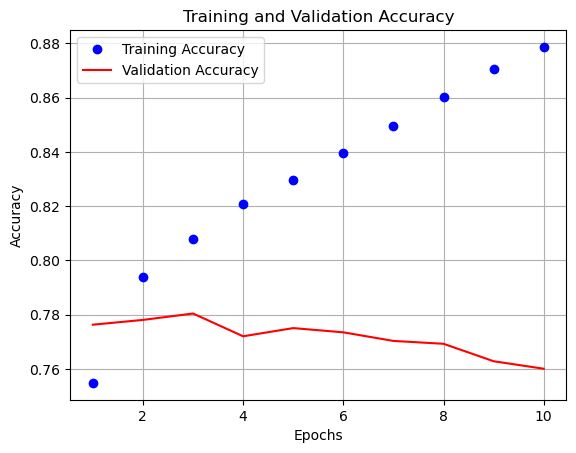

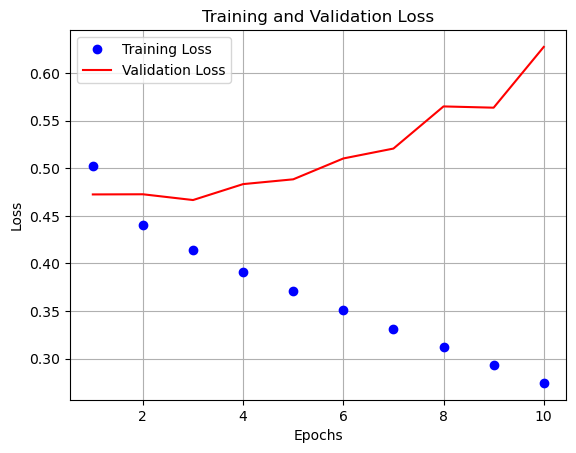

In [158]:
import matplotlib.pyplot as plt

def plot_acc_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.plot(epochs, acc, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot training and validation loss
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

#Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, shuffle=True)
plot_acc_loss(history)


The LSTM model's training results show signs of overfitting:

- **Training and Validation Accuracy:**
    - Training Accuracy increases steadily over the epochs, rising from below 0.80 to nearly 0.88, which indicates that the LSTM model is effectively learning from the training dataset.
    - Validation Accuracy remains flat, starting above 0.78 and showing minimal improvement, suggesting issues with generalizing to unseen data.
- **Training and Validation Loss**
    - TTraining Loss shows a consistent decrease from around 0.45 to just below 0.35, reflecting the model's increasing proficiency in predicting the training data accurately.
    - Training Loss decreases significantly, which contrasts with the Validation Loss that rises after an initial decrease, further indicating overfitting.

- **Recommendations:**
    - Implement Early Stopping to halt training when validation metrics stop improving.
    - Use Regularization Techniques like dropout to reduce overfitting.
    - Adjust Hyperparameters such as learning rate and LSTM units to find a better balance between training and validation performance.
    - Consider Model Simplification or increasing training data diversity to enhance generalization.

---
### Evaluation:

- Model Selection: Each model offers unique advantages. Naive Bayes is quick and efficient for less complex datasets. Word2Vec provides rich, dense feature sets, while CNNs excel in recognizing patterns in local contexts. LSTMs are best for analyzing long-term dependencies.

- Data Suitability and Overfitting: All models showed tendencies to overfit, underscoring the need for advanced regularization strategies like cyclical learning rates, ensemble methods, dropout orearly stopping.

- Hybrid Approaches: Combining Word2Vec with CNNs or LSTMs can enhance performance by integrating static embeddings with dynamic contextual analysis.


### Takeaways:

 **Challenges:** Analyzing Twitter data presents specific unique challenges that can impact model’s accuracy:  

- Tweets are limited to 280 characters, leading to condensed language and often missing crucial context.

- Frequent use of informal language, slang, acronyms, hashtags, mentions, URLs, emojis … can confuse models not trained on these variations.

- Detecting sarcasm and reading between the lines is challenging even for sophisticated models like LSTMs or CNNs.

- The topics and language on Twitter can change quickly, influenced by current events and cultural trends.

- Imbalanced classes, especially in sentiment analysis tasks, can bias models towards the majority class.


**Recommendations for Improvement:**
- Advanced Preprocessing: Better handle noise and normalize text to reduce variability.

- Augment Training Data: Enrich training datasets with varied language use and up-to-date content.

- Continuous Model Updates: Regularly update models to adapt to new language trends.

- Handle Class Imbalance: Employ techniques like synthetic data generation or class weight adjustments.

- Contextual Embeddings: Use dynamic embeddings like BERT that capture word context (comes at the cost of requiring more computational resources).

